# **Libraries**

In [1]:
# installation
!pip install nltk
!pip install google-play-scraper
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.6 MB/s eta 0:00:00


In [20]:
# import libraries

#NLTK
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords

# GOOGLE PLAY SCRAPER
from google_play_scraper import reviews_all, reviews
from google_play_scraper import app

# DATA MANIPULATION and VISUALIZATION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


# MACHINE LEARNING
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# **Get Data**

In [3]:
result, continuation_token = reviews(
    'com.telkom.mwallet', #web id
    lang= 'id', # language
    count = 400000
    )

In [4]:
# Make dataframe
data = pd.DataFrame(np.array(result),columns=['content'])
data = data.join(pd.DataFrame(data.pop('content').tolist()))
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,587b9bc8-f530-494a-bbe4-0c9cd8514611,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong permudah ganti nomer HP,1,0,4.17.0,2024-08-20 15:49:56,None,NaT,4.17.0
1,cf286a21-85e6-434b-afdf-c5789a2e0866,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aduh makin kacau ini linkAja...udah 2 hari gak...,1,0,4.36.0,2024-08-20 11:32:35,None,NaT,4.36.0
2,03f6a275-d50f-4460-afb0-34392e88fd7e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi bobrok..chat ama agen nya nunggu nya ...,1,0,None,2024-08-20 11:07:35,None,NaT,None
3,619ce06d-c977-4d44-ba06-6b16cc951dfd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Gimn ini transaksi gagal saldo terpotong dana ...,1,0,4.36.0,2024-08-20 10:11:21,"Halo Kak Yusman, mohon maaf atas ketidaknyaman...",2021-09-02 02:26:10,4.36.0
4,c4e20cde-a5f7-4d6f-9098-90c3fe23697b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Link ajah sangat buruk sekali jangan pake gaes...,1,0,None,2024-08-20 09:05:31,None,NaT,None
...,...,...,...,...,...,...,...,...,...,...,...
399995,0d3860ff-15db-429a-9732-a31b586ffbef,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Syukak pakai tcash bnyak bonusk nya 😍😍😍,5,0,2.1.0,2018-05-17 05:12:42,None,NaT,2.1.0
399996,cf2a58ec-c945-4988-995e-3b389b30c1b0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Menggunakan tcash menyenangkan,5,0,2.1.0,2018-05-17 05:12:41,None,NaT,2.1.0
399997,507df2f2-a48a-4bcd-88dd-51c3bca8ce63,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus,5,0,2.0.2,2018-05-17 05:12:41,None,NaT,2.0.2
399998,de0d9743-1720-4a46-9029-fc44f64b2817,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Love it,5,0,2.0.2,2018-05-17 05:12:41,None,NaT,2.0.2


In [5]:
# Display only review and rating
data = data[['content','score']] # select columns
data = data.rename(columns={'content':'ulasan','score':'nilai'}) # rename columns
data.head()

,ulasan,nilai
0,Tolong permudah ganti nomer HP,1
1,Aduh makin kacau ini linkAja...udah 2 hari gak...,1
2,Aplikasi bobrok..chat ama agen nya nunggu nya ...,1
3,Gimn ini transaksi gagal saldo terpotong dana ...,1
4,Link ajah sangat buruk sekali jangan pake gaes...,1


In [6]:
data.to_csv('ulasanLinkAja.csv') # Datafrane to CSV
dataLinkAja = pd.read_csv('ulasanLinkAja.csv') # Validate read csv

# **Labeling**

In [7]:
# Labeling data

# Rating 1 and 2 --> label = 0 --> Negative sentiment
# Rating 3,4, and 5 --> label = 1 --> Positive sentiment

dataLinkAja['label'] = dataLinkAja['nilai'].apply(lambda x: 0 if x <= 2 else 1)
labelSentiment_count = dataLinkAja['label'].value_counts()
labelSentiment_count

,count
label,
1,302922
0,97078


Text(0.5, 1.0, 'Sentiment Label Distribution')

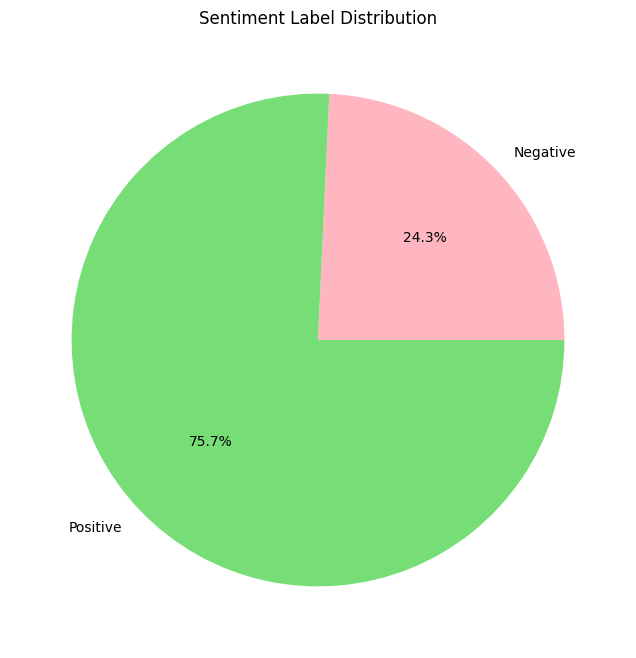

In [38]:
# Count label
label_counts = dataLinkAja['label'].value_counts().sort_index()
label_names = ['Negative', 'Positive']

# Label visualization
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_names, autopct='%1.1f%%', colors=['#FFB6C1','#77DD77'])
plt.title("Sentiment Label Distribution")


# **Preprocessing**

In [15]:
dataLinkAja['ulasan'] = dataLinkAja['ulasan'].str.lower() # Lowercasing
dataLinkAja['ulasan'] = dataLinkAja['ulasan'].str.replace(r'[^\w\s]', ' ', regex=True) # Remove punctuation

In [16]:
# Slang word handling

# Define normalization for slang word
normText = {
    "gak" : "tidak",
    "gpp" : "tidak apa",
    "dg" : "dengan",
    "ngga" : "tidak",
    "dgn" : "dengan",
    "tdk" : "tidak",
    "blm" : "belum",
    "mantap" : "bagus",
    "bgs" : "bagus",
    "gx" : "tidak",
    "sampe" : "sampai",
    "cepet" : "cepat",
    "bgt" : "sangat",
    "banget" : "sangat",
    "super" : "bagus",
    "paling" : "sangat",
    "bagu" : "bagus",
    "baguss" : "bagus"
}

# Normalization function
def normalisasi(slang_word):

  slang_word = str(slang_word)
  # Slang word checker
  for i in normText:
    slang_word = slang_word.replace(i, normText[i])

  return slang_word

# Apply function to ulasan column
dataLinkAja['ulasan'] = dataLinkAja['ulasan'].apply(lambda x: normalisasi(x))

In [22]:
# Tokenization
dataLinkAja['tokens'] = dataLinkAja['ulasan'].apply(lambda x:x.split())

In [23]:
# Stopwords removal

# Set stopwords for indonesian language
all_stopwords = stopwords.words('indonesian')

# Define additional stopwords (optional)
additional_stopwords = ['nya', 'di', 'yg',
                        'yang', 'tolong', 'link',
                        'aja', 'linkaja', 'aplikasi',
                        'ini', 'ga', 'gk', 'udah', 'bisa', 'ya']
all_stopwords.extend(additional_stopwords)

In [27]:
# Lemmatization

def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
dataLinkAja['ulasan_clean'] = dataLinkAja['tokens'].apply(lambda x: lemmatize_text(x))

In [29]:
dataLinkAja.head()

,Unnamed: 0,ulasan,nilai,label,tokens,ulasan_clean
0,0,tolong permudah ganti nomer hp,1,0,"[tolong, permudah, ganti, nomer, hp]",permudah ganti nomer hp
1,1,aduh makin kacau ini linkajaudah 2 hari tidak ...,1,0,"[aduh, makin, kacau, ini, linkajaudah, 2, hari...",aduh kacau linkajaudah 2 ngirim sesema bank li...
2,2,aplikasi bobrokchat ama agen nya nunggu nya am...,1,0,"[aplikasi, bobrokchat, ama, agen, nya, nunggu,...",bobrokchat ama agen nunggu ampe setahunpantas ...
3,3,gimn ini transaksi gagal saldo terpotong dana ...,1,0,"[gimn, ini, transaksi, gagal, saldo, terpotong...",gimn transaksi gagal saldo terpotong dana telp...
4,4,link ajah sangat buruk sekali jangan pake gaes...,1,0,"[link, ajah, sangat, buruk, sekali, jangan, pa...",ajah buruk pake gaess susah upgradenya saldo 2...


# **Exploration Sentimen Analysis**

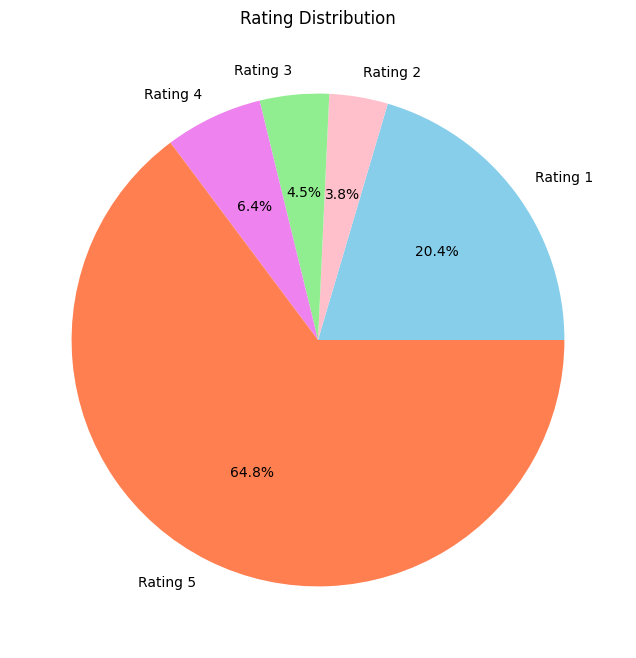

In [36]:
# Count rating
rating_counts = dataLinkAja['nilai'].value_counts().sort_index()
rating_labels = ['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5']

# Rating visualization
plt.figure(figsize=(8, 8))
colors=['skyblue','pink','lightgreen','violet','coral']
plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%', colors=colors)
plt.title("Rating Distribution")
plt.show()

**Wordcloud**

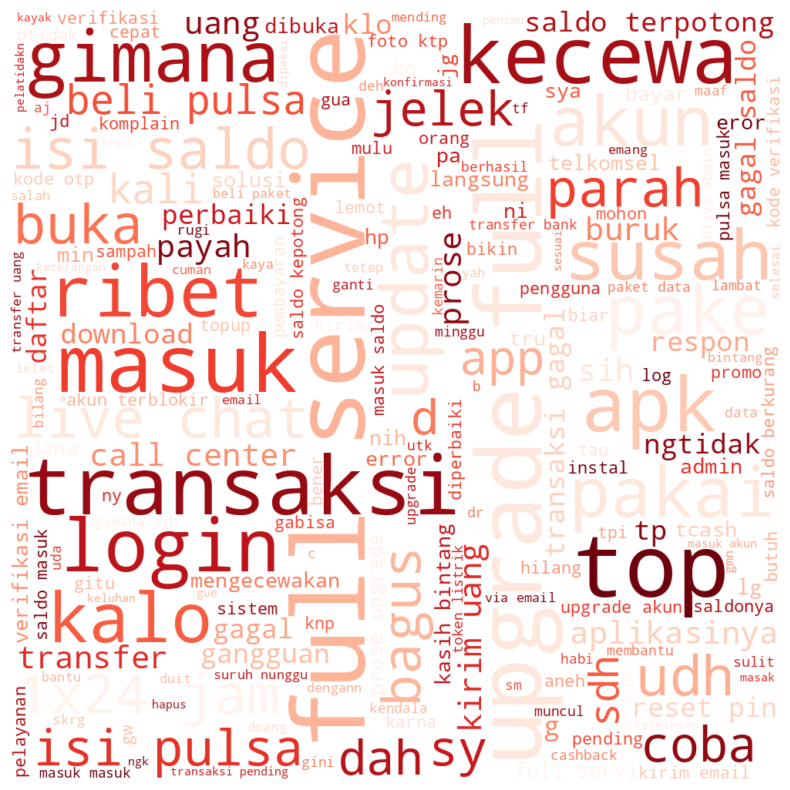

In [40]:
# Define train_0 for negative sentimen label
train_0 = dataLinkAja[dataLinkAja["label"] == 0]

# Visualization
all_text_0 = ' '.join(word for word in train_0["ulasan_clean"]) # join all reviews

wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_0)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
# Since LinkAja is an e-wallet service, we want to see further about
# the reviews related to transaction issues

keywords = ['transaksi', 'transfer', 'saldo']

# get reviews that contain keywords
def contain_keywords(text):
    return any(keyword in text for keyword in keywords)

# transaction issues dataframe
transaction_issues = train_0[train_0['ulasan_clean'].apply(contain_keywords)]
transaction_issues = transaction_issues[['ulasan_clean']]

# Keep transaction issues data to CSV
transaction_issues.to_csv('transaction_issues.csv', index=False)

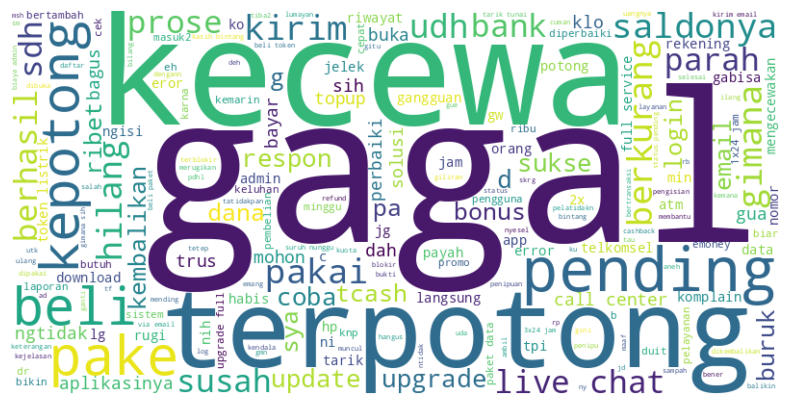

In [47]:
# Transaction issues wordcloud

additional_stopwords = {'saldo', 'top', 'transaksi', 'isi', 'transfer',
                        'pembayaran', 'aplikasi', 'masuk', 'apk','aja', 'ini',
                        'kali','kalo','sy','tp','saya','uang','akun','pulsa'}

text = " ".join(review for review in transaction_issues['ulasan_clean'])

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS.union(additional_stopwords)).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

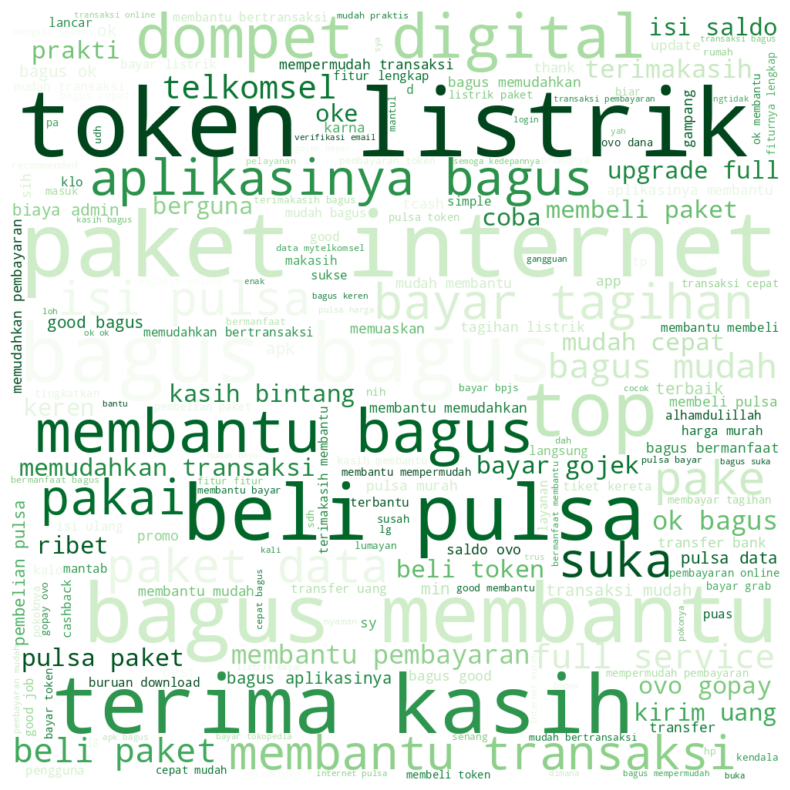

In [62]:
# Define train_1 for positive sentimen label
train_1  = dataLinkAja[dataLinkAja["label"] == 1]

# Visualization
all_text_1 = ' '.join(word for word in train_1["ulasan_clean"]) # join all reviews

wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_1)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Machine Learning**

In [50]:
# Splitting data

x = dataLinkAja.ulasan_clean
y = dataLinkAja.label

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [52]:
tvec = TfidfVectorizer() # Vectorizer TF-IDF
clf1 = LogisticRegression() # Model algorithm

# Define pipeline
model1 = Pipeline([('vectorizer', tvec), ('classifier', clf1)])

In [54]:
model_1 = model1.fit(x_train,y_train) # Model Training
predict1 = model1.predict(x_test) # Model Predicting

matrix = classification_report(y_test,predict1) # Evaluation report
print("classification_repot: \n", matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


classification_repot: 
               precision    recall  f1-score   support

           0       0.80      0.79      0.80     24492
           1       0.93      0.94      0.93     75508

    accuracy                           0.90    100000
   macro avg       0.87      0.86      0.87    100000
weighted avg       0.90      0.90      0.90    100000



In [57]:
# Evaluation metrics
accuracy_model1 = accuracy_score(predict1,y_test)
precision_model1 = precision_score(y_test, predict1, average='weighted')
recall_model1 = recall_score(y_test, predict1, average='weighted')
f1_model1 = f1_score(y_test, predict1, average='weighted')

# Make dataframe
model = {'Model' : ['Logistic Regression'],
         'Accuracy' : [accuracy_model1],
         'Precision' : [precision_model1],
         'Recall' : [recall_model1],
         'F1' : [f1_model1]
         }

df_model = pd.DataFrame(model)
df_model

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.90117,0.900662,0.90117,0.900899


**Use model for prediction**

In [61]:
def get_user_reviews(num):
  print("="*100)
  reviews = [input(f"Review {i+1}: ") for i in range(num)]
  return reviews


def predict_and_display_reviews(reviews):
  model = ('Logistic Regression', model_1)
  print("="*100)

  for review in reviews:
    prediction = model[1].predict([review])[0]
    print(f"\nReview: {review}")
    print(f"Predict Review Result with {model[0]}: {prediction}")

# Main program
num_review = int(input("Number of reviews you want to input: "))
user_reviews = get_user_reviews(num_review)
predict_and_display_reviews(user_reviews)

Number of reviews you want to input: 3
Review 1: duh bingung, chat cs tapi gada solusi
Review 2: keren nih inovasinya, bikin mudah pembayaran!!
Review 3: saya transfer uang, dana sudah kepotong tapi uang masih blm diterima temen saya

Review: duh bingung, chat cs tapi gada solusi
Predict Review Result with Logistic Regression: 0

Review: keren nih inovasinya, bikin mudah pembayaran!!
Predict Review Result with Logistic Regression: 1

Review: saya transfer uang, dana sudah kepotong tapi uang masih blm diterima temen saya
Predict Review Result with Logistic Regression: 0
